## Init

In [1]:
import numpy as np
import tensorflow as tf

import keras
from keras.layers import *

from pathlib import Path
import matplotlib.pyplot as plt
from stn import SpatialTransformer

2023-05-09 06:51:30.106887: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 06:51:30.285589: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-09 06:51:30.291108: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-09 06:51:30.291141: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

## Load data

In [2]:
(X, _), _ = tf.keras.datasets.mnist.load_data()
X = np.reshape(X / 255.0, (-1, 28, 28, 1))
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=120)

## Callbacks

In [3]:
from keras import callbacks

def save_image_samples(samples, name, dir="images", show=False):
    fig = plt.figure(figsize=(8, 8), frameon=False)
    for n in range(25):
        ax = plt.subplot(5, 5, n+1)
        ax.imshow(samples[n], cmap="binary")
        ax.axis("off")

    dir = Path(dir)
    dir.mkdir(exist_ok=True)
    fig.savefig(dir / name)
    if not show:
        plt.close()

class DisplaySamples(callbacks.Callback):
    def __init__(self, samples, dir="images"):
        super().__init__()
        self.samples = samples
        self.dir = dir

    def on_epoch_end(self, epoch, *args):
        transformer = self.model
        preds = transformer(self.samples)
        save_image_samples(preds, f"sample_{epoch+1}.jpg", self.dir)

    def on_train_begin(self, *args):
        save_image_samples(self.samples, "sample_0.jpg", self.dir)


## Compile and train the model

In [4]:
model = SpatialTransformer([
        Conv2D(32, (5, 5), padding='same', activation='relu'),
        Conv2D(16, (5, 5), padding='same', activation='relu')
])

model.compile(optimizer='adam', loss='mse')

2023-05-09 06:51:33.693019: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-09 06:51:33.693037: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-09 06:51:33.693053: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2023-05-09 06:51:33.693256: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.fit(datagen.flow(X, X), callbacks=[DisplaySamples(next(datagen.flow(X, X))[0])], epochs=1) # 100 epochs for best results

1875/1875 [==============================] - 31s 16ms/step - loss: 0.0572


## Test on random sample

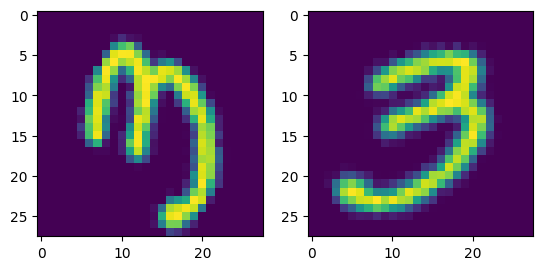

In [36]:
x, y = next(datagen.flow(X, X, batch_size=1))
fig, subs = plt.subplots(1, 2)
subs[0].imshow(x[0])
subs[1].imshow(model(x)[0])